# Tokyo 2020 Paralympics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from datetime import timedelta
import requests
from bs4 import BeautifulSoup as bs

#### Importing dataframe, analysing and cleaning data

In [4]:
#importing csv file into Pandas Dataframe and saving as an object
tokyo2020 = pd.read_csv('tokyo2020_paralympics.csv')

In [5]:
tokyo2020.head() #review first 5 rows 

,title,playcount,date,devices,traffic,content
0,Tokyo 2020: Paralympics Live,1338,2021-08-26,Smartphone,Direct traffic,IH000403361
1,Tokyo 2020: Paralympics Live,1161,2021-08-29,Smartphone,Direct traffic,IH000403364
2,Tokyo 2020: Today At The Paralympics E12,848,2021-09-04,Desktop,Direct traffic,IH000403384
3,Tokyo 2020: Paralympics Live,723,2021-08-25,Smartphone,Direct traffic,IH000403360
4,Tokyo 2020: Today At The Paralympics E12,707,2021-09-04,Desktop,Search engines,IH000403384


In [6]:
print(tokyo2020.shape)

(1339, 6)


In [7]:
tokyo2020[['title', 'playcount', 'devices']]

,title,playcount,devices
0,Tokyo 2020: Paralympics Live,1338,Smartphone
1,Tokyo 2020: Paralympics Live,1161,Smartphone
2,Tokyo 2020: Today At The Paralympics E12,848,Desktop
3,Tokyo 2020: Paralympics Live,723,Smartphone
4,Tokyo 2020: Today At The Paralympics E12,707,Desktop
...,...,...,...
1334,Tokyo 2020: Paralympics Live E13,1,Undefined
1335,Tokyo 2020: Paralympics Live E13,1,Desktop
1336,Tokyo 2020: Today At The Paralympics E13,1,Undefined
1337,Tokyo 2020: Today At The Paralympics E13,1,Tablet


In [8]:
tokyo2020[0:10] #Assessing Columns

,title,playcount,date,devices,traffic,content
0,Tokyo 2020: Paralympics Live,1338,2021-08-26,Smartphone,Direct traffic,IH000403361
1,Tokyo 2020: Paralympics Live,1161,2021-08-29,Smartphone,Direct traffic,IH000403364
2,Tokyo 2020: Today At The Paralympics E12,848,2021-09-04,Desktop,Direct traffic,IH000403384
3,Tokyo 2020: Paralympics Live,723,2021-08-25,Smartphone,Direct traffic,IH000403360
4,Tokyo 2020: Today At The Paralympics E12,707,2021-09-04,Desktop,Search engines,IH000403384
5,Tokyo 2020: Today At The Paralympics E9,705,2021-09-01,Desktop,Direct traffic,IH000403381
6,Tokyo 2020: Paralympics Live,685,2021-08-30,Smartphone,Direct traffic,IH000403365
7,Tokyo 2020: Paralympics Live,663,2021-08-26,Desktop,Search engines,IH000403361
8,Tokyo 2020: Paralympics Live,659,2021-08-28,Smartphone,Direct traffic,IH000403363
9,Tokyo 2020: Paralympics Live,656,2021-08-26,Desktop,Direct traffic,IH000403361


In [9]:
tokyo_labelled = tokyo2020.set_index('title') #Use function to change index

In [10]:
tokyo_labelled.head()

,playcount,date,devices,traffic,content
title,,,,,
Tokyo 2020: Paralympics Live,1338,2021-08-26,Smartphone,Direct traffic,IH000403361
Tokyo 2020: Paralympics Live,1161,2021-08-29,Smartphone,Direct traffic,IH000403364
Tokyo 2020: Today At The Paralympics E12,848,2021-09-04,Desktop,Direct traffic,IH000403384
Tokyo 2020: Paralympics Live,723,2021-08-25,Smartphone,Direct traffic,IH000403360
Tokyo 2020: Today At The Paralympics E12,707,2021-09-04,Desktop,Search engines,IH000403384


In [11]:
tokyo_labelled.iloc[[0,2,3,4], [0,2,3,4]] 

,playcount,devices,traffic,content
title,,,,
Tokyo 2020: Paralympics Live,1338,Smartphone,Direct traffic,IH000403361
Tokyo 2020: Today At The Paralympics E12,848,Desktop,Direct traffic,IH000403384
Tokyo 2020: Paralympics Live,723,Smartphone,Direct traffic,IH000403360
Tokyo 2020: Today At The Paralympics E12,707,Desktop,Search engines,IH000403384


In [12]:
# Filtering by playcount
tokyo_labelled[tokyo_labelled['playcount'] > 500] 

,playcount,date,devices,traffic,content
title,,,,,
Tokyo 2020: Paralympics Live,1338,2021-08-26,Smartphone,Direct traffic,IH000403361
Tokyo 2020: Paralympics Live,1161,2021-08-29,Smartphone,Direct traffic,IH000403364
Tokyo 2020: Today At The Paralympics E12,848,2021-09-04,Desktop,Direct traffic,IH000403384
Tokyo 2020: Paralympics Live,723,2021-08-25,Smartphone,Direct traffic,IH000403360
Tokyo 2020: Today At The Paralympics E12,707,2021-09-04,Desktop,Search engines,IH000403384
Tokyo 2020: Today At The Paralympics E9,705,2021-09-01,Desktop,Direct traffic,IH000403381
Tokyo 2020: Paralympics Live,685,2021-08-30,Smartphone,Direct traffic,IH000403365
Tokyo 2020: Paralympics Live,663,2021-08-26,Desktop,Search engines,IH000403361
Tokyo 2020: Paralympics Live,659,2021-08-28,Smartphone,Direct traffic,IH000403363


In [13]:
#Filtering by playcount and device
tokyo_labelled[(tokyo_labelled['playcount'] > 500) & (tokyo_labelled['devices']=='Smartphone')]

,playcount,date,devices,traffic,content
title,,,,,
Tokyo 2020: Paralympics Live,1338,2021-08-26,Smartphone,Direct traffic,IH000403361
Tokyo 2020: Paralympics Live,1161,2021-08-29,Smartphone,Direct traffic,IH000403364
Tokyo 2020: Paralympics Live,723,2021-08-25,Smartphone,Direct traffic,IH000403360
Tokyo 2020: Paralympics Live,685,2021-08-30,Smartphone,Direct traffic,IH000403365
Tokyo 2020: Paralympics Live,659,2021-08-28,Smartphone,Direct traffic,IH000403363
Tokyo 2020: Swimming,652,2021-08-24,Smartphone,Direct traffic,PI000017060
Tokyo 2020: Cycling - Road,563,2021-09-03,Smartphone,Direct traffic,PI000017122
Tokyo 2020: Paralympics Live,548,2021-08-27,Smartphone,Direct traffic,IH000403362


In [14]:
#Filtering by playcount and device
tokyo_labelled.drop_duplicates()

,playcount,date,devices,traffic,content
title,,,,,
Tokyo 2020: Paralympics Live,1338,2021-08-26,Smartphone,Direct traffic,IH000403361
Tokyo 2020: Paralympics Live,1161,2021-08-29,Smartphone,Direct traffic,IH000403364
Tokyo 2020: Today At The Paralympics E12,848,2021-09-04,Desktop,Direct traffic,IH000403384
Tokyo 2020: Paralympics Live,723,2021-08-25,Smartphone,Direct traffic,IH000403360
Tokyo 2020: Today At The Paralympics E12,707,2021-09-04,Desktop,Search engines,IH000403384
...,...,...,...,...,...
Tokyo 2020: Paralympics Live E13,1,2021-09-05,Undefined,NaN,IH000403371
Tokyo 2020: Paralympics Live E13,1,2021-09-05,Desktop,Search engines,IH000403371
Tokyo 2020: Today At The Paralympics E13,1,2021-09-05,Undefined,NaN,IH000403385


In [15]:
print(tokyo_labelled.shape)

(1339, 5)


In [16]:
#Percentage of nulls
tokyo2020.isnull().sum() / tokyo2020.shape[0] * 100

title        0.000000
playcount    0.000000
date         0.373413
devices      0.000000
traffic      0.896191
content      0.000000
dtype: float64

In [17]:
tokyo2020.shape[0]

1339

In [18]:
#Drop anything without a date
tokyo2020 = tokyo2020.dropna(subset=['date'])

In [7]:
tokyo2020

,title,playcount,date,devices,traffic,content
0,Tokyo 2020: Paralympics Live,1338,2021-08-26,Smartphone,Direct traffic,IH000403361
1,Tokyo 2020: Paralympics Live,1161,2021-08-29,Smartphone,Direct traffic,IH000403364
2,Tokyo 2020: Today At The Paralympics E12,848,2021-09-04,Desktop,Direct traffic,IH000403384
3,Tokyo 2020: Paralympics Live,723,2021-08-25,Smartphone,Direct traffic,IH000403360
4,Tokyo 2020: Today At The Paralympics E12,707,2021-09-04,Desktop,Search engines,IH000403384
...,...,...,...,...,...,...
1334,Tokyo 2020: Paralympics Live E13,1,2021-09-05,Undefined,NaN,IH000403371
1335,Tokyo 2020: Paralympics Live E13,1,2021-09-05,Desktop,Search engines,IH000403371
1336,Tokyo 2020: Today At The Paralympics E13,1,2021-09-05,Undefined,NaN,IH000403385
1337,Tokyo 2020: Today At The Paralympics E13,1,2021-09-05,Tablet,Direct traffic,IH000403385


In [20]:
#Drop anything without a date
tokyo2020 = tokyo2020.fillna({'traffic':'Unknown'})

In [22]:
tokyo2020.head()

,title,playcount,date,devices,traffic,content
0,Tokyo 2020: Paralympics Live,1338,2021-08-26,Smartphone,Direct traffic,IH000403361
1,Tokyo 2020: Paralympics Live,1161,2021-08-29,Smartphone,Direct traffic,IH000403364
2,Tokyo 2020: Today At The Paralympics E12,848,2021-09-04,Desktop,Direct traffic,IH000403384
3,Tokyo 2020: Paralympics Live,723,2021-08-25,Smartphone,Direct traffic,IH000403360
4,Tokyo 2020: Today At The Paralympics E12,707,2021-09-04,Desktop,Search engines,IH000403384


In [10]:
tokyo2020 = tokyo2020.isnull().sum() / tokyo2020.shape[0] * 100

In [24]:
#Average playcount
tokyo2020.mean()

playcount    43.856072
dtype: float64

In [14]:
tokyo2020.dtypes

AttributeError: 'Timestamp' object has no attribute 'dtypes'

In [15]:
#Converting date to a datetime object 
tokyo2020['date'] = pd.to_datetime(tokyo2020['date'])

TypeError: 'Timestamp' object is not subscriptable

In [27]:
tokyo2020.dtypes

title                object
playcount             int64
date         datetime64[ns]
devices              object
traffic              object
content              object
dtype: object

In [28]:
#Set the date as the new index
tokyo2020.set_index('date')

,title,playcount,devices,traffic,content
date,,,,,
2021-08-26,Tokyo 2020: Paralympics Live,1338,Smartphone,Direct traffic,IH000403361
2021-08-29,Tokyo 2020: Paralympics Live,1161,Smartphone,Direct traffic,IH000403364
2021-09-04,Tokyo 2020: Today At The Paralympics E12,848,Desktop,Direct traffic,IH000403384
2021-08-25,Tokyo 2020: Paralympics Live,723,Smartphone,Direct traffic,IH000403360
2021-09-04,Tokyo 2020: Today At The Paralympics E12,707,Desktop,Search engines,IH000403384
...,...,...,...,...,...
2021-09-05,Tokyo 2020: Paralympics Live E13,1,Undefined,Unknown,IH000403371
2021-09-05,Tokyo 2020: Paralympics Live E13,1,Desktop,Search engines,IH000403371
2021-09-05,Tokyo 2020: Today At The Paralympics E13,1,Undefined,Unknown,IH000403385


<AxesSubplot:>

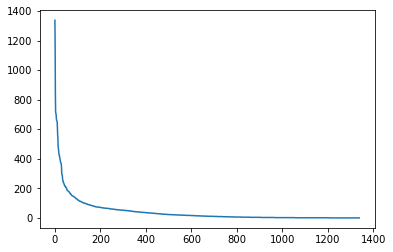

In [29]:
#Plotting by playcount
tokyo2020['playcount'].plot()

<AxesSubplot:>

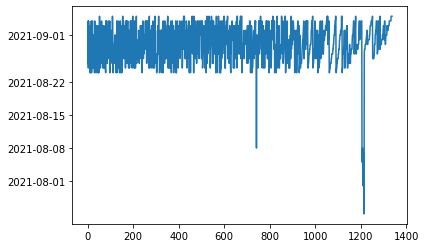

In [30]:
tokyo2020['date'].plot()

AttributeError: 'Timestamp' object has no attribute 'dtypes'

# Web Scraping

In [31]:
medals = requests.get('https://www.bbc.com/sport/disability-sport/58267874')

In [32]:
medals = requests.get('https://www.bbc.com/sport/disability-sport/58267874')
gold = bs(medals.content, 'lxml')

In [33]:
table = gold.find("table", {"class":"gs-o-table story-body__table"})

In [35]:
gold = pd.read_html(str(table))[0]

In [36]:
gold.head()

,Rank,Country,Gold,Silver,Bronze,Total
0,1,China,96,60,51,207
1,2,Great Britain,41,38,45,124
2,3,USA,37,36,31,104
3,4,RPC,36,33,49,118
4,5,Netherlands,25,17,17,59


In [37]:
gold.dtypes

Rank        int64
Country    object
Gold        int64
Silver      int64
Bronze      int64
Total       int64
dtype: object

In [41]:
gold_ireland = gold[(gold['Total'] < 10)]

In [42]:
gold_ireland.head()

,Rank,Country,Gold,Silver,Bronze,Total
21,22,Israel,6,2,1,9
26,27,Belarus,5,1,1,7
31,32,Ireland,4,2,1,7
33,34,South Africa,4,1,2,7
34,35,Cuba,4,1,1,6


In [45]:
gold_ireland_labelled = gold_ireland.set_index('Rank') #Use function to change index

In [47]:
gold_ireland_labelled.head()

,Country,Gold,Silver,Bronze,Total
Rank,,,,,
22,Israel,6,2,1,9
27,Belarus,5,1,1,7
32,Ireland,4,2,1,7
34,South Africa,4,1,2,7
35,Cuba,4,1,1,6
